In [1]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 9.3MB/s 


In [2]:
# Necessary Imports
import os
import os.path
import urllib
from urllib import request
import numpy as np
import pandas as pd
import xlsxwriter
from matplotlib import pyplot as plt
from statistics import mean, median

In [3]:
# Download Data Files if Not Currently Downloaded into the Current Working Directory
DOWNLOAD_DIR = "/content/"

# Set Needed File Names
needed_files = ["nba odds 2007-08.xlsx", "nba odds 2008-09.xlsx",
                "nba odds 2009-10.xlsx", "nba odds 2010-11.xlsx",
                "nba odds 2011-12.xlsx", "nba odds 2012-13.xlsx",
                "nba odds 2013-14.xlsx", "nba odds 2014-15.xlsx",
                "nba odds 2015-16.xlsx", "nba odds 2016-17.xlsx",
                "nba odds 2017-18.xlsx", "nba odds 2018-19.xlsx",
                "nba odds 2019-20.xlsx", "nba odds 2020-21.xlsx"]

# Remove Space from Needed File Names
file_urls = []
for filename in needed_files:
  file_urls.append(filename.replace(' ', '%20'))
  
# Create Season Data List
season_data = []

# Read and Download Needed Files
for i in range(len(needed_files)):
    if not os.path.isfile(DOWNLOAD_DIR + needed_files[i]):
      DOWNLOAD_ROOT = "https://raw.githubusercontent.com/LMastro99/Sports-Betting-Module/main/season-data/raw-data/"
      url = DOWNLOAD_ROOT + file_urls[i]
      urllib.request.urlretrieve(url, DOWNLOAD_DIR + needed_files[i])
    print("Downloaded", needed_files[i])    

    # Create Dataframe "Layers" with the Data From the XLSX Files
    download = pd.read_excel(DOWNLOAD_DIR + needed_files[i])
    season_data.append(download)

# Convert Season Data to Numpy Array of DataFrames
season_data = np.array(season_data, dtype = 'object')

Downloaded nba odds 2007-08.xlsx
Downloaded nba odds 2008-09.xlsx
Downloaded nba odds 2009-10.xlsx
Downloaded nba odds 2010-11.xlsx
Downloaded nba odds 2011-12.xlsx
Downloaded nba odds 2012-13.xlsx
Downloaded nba odds 2013-14.xlsx
Downloaded nba odds 2014-15.xlsx
Downloaded nba odds 2015-16.xlsx
Downloaded nba odds 2016-17.xlsx
Downloaded nba odds 2017-18.xlsx
Downloaded nba odds 2018-19.xlsx
Downloaded nba odds 2019-20.xlsx
Downloaded nba odds 2020-21.xlsx


In [4]:
# Correct Date Column
for i in range(len(season_data)):
  season_data[i]['Date'] = season_data[i]['Date'].astype('object')
  ymod = 1
  for r in range(len(season_data[i])):
    date = season_data[i]['Date'][r]
    month = str (date // 100)
    day = str (date % 100)
    if (month == '1' and int (day) >= 1):
      ymod = 0
    year = str (2000 + int (needed_files[i][-7:-5]) - ymod)
    date = month + '/' + day + '/' + year
    season_data[i]['Date'][r] = date
  season_data[i]['Date'] = pd.to_datetime(season_data[i]['Date'], format = '%m/%d/%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [5]:
# View All Season Data Info
for s in range(len(season_data)):
  print(needed_files[s])
  print(season_data[s].info())
  print()

nba odds 2007-08.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2632 non-null   datetime64[ns]
 1   Rot     2632 non-null   int64         
 2   VH      2632 non-null   object        
 3   Team    2632 non-null   object        
 4   1st     2632 non-null   int64         
 5   2nd     2632 non-null   int64         
 6   3rd     2632 non-null   int64         
 7   4th     2632 non-null   int64         
 8   Final   2632 non-null   int64         
 9   Open    2632 non-null   object        
 10  Close   2632 non-null   object        
 11  ML      2632 non-null   object        
 12  2H      2632 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 267.4+ KB
None

nba odds 2008-09.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 13 columns):
 #   

In [6]:
# Drop ['Rot'], ['Open'], and ['2H'] Columns from each Season's Data
for s in range(len(season_data)):
  season_data[s].drop(columns = ['Rot', 'Open', 'Close', '2H'], inplace = True)

In [7]:
# Rename ['VH'] to ['Home'] for each Season
for s in range(len(season_data)):
  season_data[s].rename(columns = {'VH' : 'Home'}, inplace = True)

In [8]:
# View All Season Data Info
for s in range(len(season_data)):
  print(needed_files[s])
  print(season_data[s].info())
  print()

nba odds 2007-08.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2632 non-null   datetime64[ns]
 1   Home    2632 non-null   object        
 2   Team    2632 non-null   object        
 3   1st     2632 non-null   int64         
 4   2nd     2632 non-null   int64         
 5   3rd     2632 non-null   int64         
 6   4th     2632 non-null   int64         
 7   Final   2632 non-null   int64         
 8   ML      2632 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 185.2+ KB
None

nba odds 2008-09.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2630 non-null   datetime64[ns]
 1   Home    2630 non-null   object        
 2   Te

In [9]:
# Note Incorrect Data Types ['ML'] != int64
print(season_data[0].dtypes, '\n\n' + 'ML\t\t ' + str (season_data[0].dtypes['ML']) + '\n')
print(season_data[2].dtypes, '\n\n' + 'ML\t\t' + str (season_data[2].dtypes['ML']))

Date     datetime64[ns]
Home             object
Team             object
1st               int64
2nd               int64
3rd               int64
4th               int64
Final             int64
ML               object
dtype: object 

ML		 object

Date     datetime64[ns]
Home             object
Team             object
1st               int64
2nd               int64
3rd               int64
4th               int64
Final             int64
ML              float64
dtype: object 

ML		float64


In [10]:
# Show Error Games [Pt. 1]
current_season = season_data[0]
current_season[current_season['ML']  == 'NL']

,Date,Home,Team,1st,2nd,3rd,4th,Final,ML
2184,2008-03-30,V,Miami,13,17,18,14,62,NL
2185,2008-03-30,H,Boston,32,18,18,20,88,NL


In [11]:
# Show Error Games [Pt. 2]
current_season = season_data[2]
current_season[current_season['ML'] % 1 != 0]
current_season.loc[142:143]

,Date,Home,Team,1st,2nd,3rd,4th,Final,ML
142,2009-11-06,V,Atlanta,24,24,21,14,83,-7.5
143,2009-11-06,H,Charlotte,28,33,23,19,103,120.0


In [12]:
# Drop Incorrect Games to a Separate DataFrame "Layer"
incorrect_games_list = []
for s in range(len(season_data)):
  current_season = season_data[s]
  if (s == 0):
    incorrect_games = current_season[current_season['ML'] == 'NL']
  elif (s == 2):
    incorrect_games = current_season.loc[142:143]
  else:
    incorrect_games = current_season[current_season['ML'] % 1 != 0]
  num_incorrect_games = len(incorrect_games)
  if (num_incorrect_games > 0):
    season_data[s] = current_season.append(incorrect_games).drop_duplicates(keep=False)
    season_data[s]['ML']
  incorrect_games_list.append(incorrect_games)

In [13]:
# Export Incorrect Games Data
writer = pd.ExcelWriter('incorrect games.xlsx', engine='xlsxwriter')
for i in range(len(incorrect_games_list)):
  year = str (2007 + i) + '-' + str (8 + i)
  incorrect_games_list[i].to_excel(writer, sheet_name = year)
writer.save()

In [14]:
# Correct Types
for i in [0, 2]:
  season_data[i]['ML'] = season_data[i]['ML'].astype('int64')

In [15]:
season_data[1]['1st'][1028] = 29
season_data[1]['2nd'][1028] = 31

season_data[1]['1st'][1029] = 24
season_data[1]['2nd'][1029] = 21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3

In [16]:
season_data[2]['1st'][1112] = 24
season_data[2]['2nd'][1112] = 27

season_data[2]['1st'][1113] = 24
season_data[2]['2nd'][1113] = 31

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3

In [17]:
# Drop Neutral Games to a Separate DataFrame "Layer"
neutral_games_list = []
for s in range(len(season_data)):
  current_season = season_data[s]
  neutral_games = pd.DataFrame(current_season[current_season['Home'] == 'N'])
  num_neutral_games = len(pd.DataFrame(neutral_games))
  if (num_neutral_games > 0):
    season_data[s] = current_season.append(neutral_games).drop_duplicates(keep=False)
  neutral_games_list.append(neutral_games)

In [18]:
# Export Neutral Games Data
writer = pd.ExcelWriter('neutral games.xlsx', engine='xlsxwriter')
for n in range(len(neutral_games_list)):
  year = str (2007 + n) + '-' + str (8 + n)
  neutral_games_list[n].to_excel(writer, sheet_name = year)
writer.save()

In [19]:
# Export Home-Away Games Data
writer = pd.ExcelWriter('home-away games.xlsx', engine='xlsxwriter')
for s in range(len(season_data)):
  year = str (2007 + s) + '-' + str (8 + s)
  season_data[s].to_excel(writer, sheet_name = year)
writer.save()

In [20]:
# View All Season Data Info
for s in range(len(season_data)):
  print(needed_files[s])
  print(season_data[s].info())
  print()

nba odds 2007-08.xlsx
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 0 to 2631
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2630 non-null   datetime64[ns]
 1   Home    2630 non-null   object        
 2   Team    2630 non-null   object        
 3   1st     2630 non-null   int64         
 4   2nd     2630 non-null   int64         
 5   3rd     2630 non-null   int64         
 6   4th     2630 non-null   int64         
 7   Final   2630 non-null   int64         
 8   ML      2630 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 205.5+ KB
None

nba odds 2008-09.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2630 non-null   datetime64[ns]
 1   Home    2630 non-null   object        
 2   Te

In [21]:
# Describe Each Column
x = []
col_max = []
col_min = []
col_med = []
final_max = []
final_min = []
final_med = []
for s in range(len(season_data)):
  current_season = season_data[s]
  columns = current_season.columns
  c_max = []
  c_min = []
  c_med = []
  f_max = []
  f_min = []
  f_med = []
  year = 0
  labels = []
  for c in range(3, len(columns)):
    # print(current_season.describe())
    year = str (2007 + s) + '-' + str (8 + s)
    c_max.append(current_season[columns[c]].max())
    c_min.append(current_season[columns[c]].min())
    c_med.append(median(current_season[columns[c]]))
    f_max.append(current_season[columns[-2]].max())
    f_min.append(current_season[columns[-2]].min())
    f_med.append(median(current_season[columns[-2]]))
    labels.append(columns[c])
  x.append(year)
  col_max.append(c_max)
  col_min.append(c_min)
  col_med.append(c_med)
  final_max.append(f_max)
  final_min.append(f_min)
  final_med.append(f_med)
x = np.array(x)
col_max = np.array(col_max)
col_min = np.array(col_min)
col_med = np.array(col_med)
final_max = np.array(final_max)
final_min = np.array(final_min)
final_med = np.array(final_med)

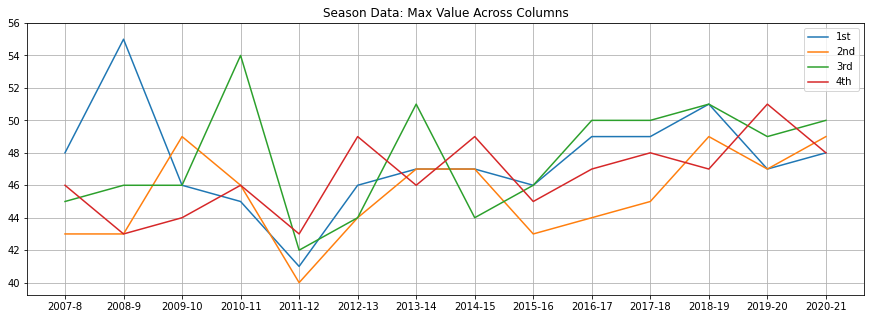

In [22]:
plt.figure(figsize = (15, 5))
plt.title('Season Data: Max Value Across Columns')
plt.plot(x, col_max[:, :-2])
plt.yticks(np.arange(40, 57, step = 2))
plt.legend(labels = labels)
plt.grid(True)

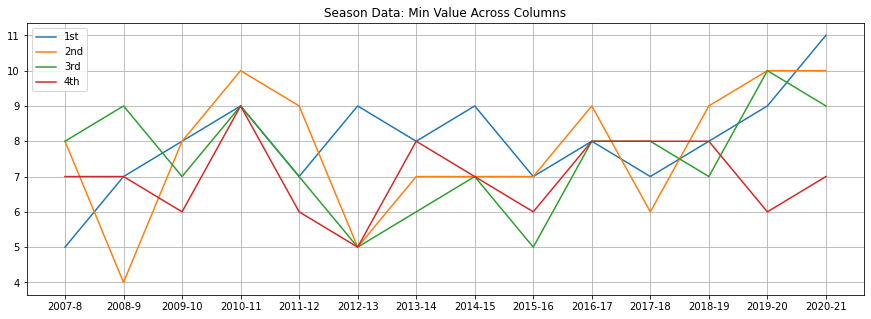

In [23]:
plt.figure(figsize = (15, 5))
plt.title('Season Data: Min Value Across Columns')
plt.plot(x, col_min[:, :-2])
plt.yticks(np.arange(4, 12, step = 1))
plt.legend(labels = labels)
plt.grid(True)

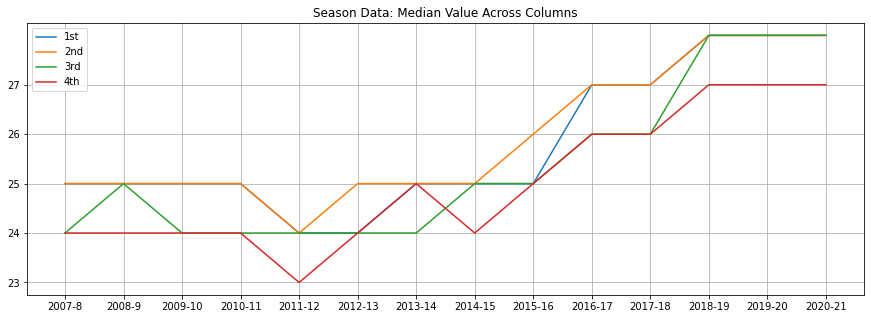

In [24]:
plt.figure(figsize = (15, 5))
plt.title('Season Data: Median Value Across Columns')
plt.plot(x, col_med[:, :-2])
plt.yticks(np.arange(23, 28, step = 1))
plt.legend(labels = labels)
plt.grid(True)

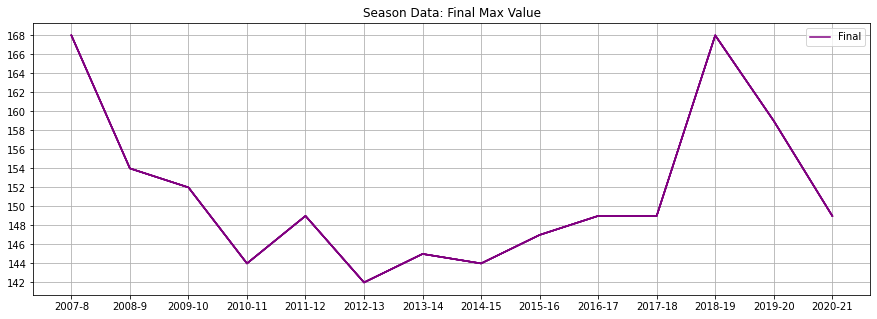

In [25]:
plt.figure(figsize = (15, 5))
plt.title('Season Data: Final Max Value')
plt.plot(x, final_max, c = 'purple')
plt.yticks(np.arange(142, 170, step = 2))
plt.legend(labels = [labels[-2]])
plt.grid(True)

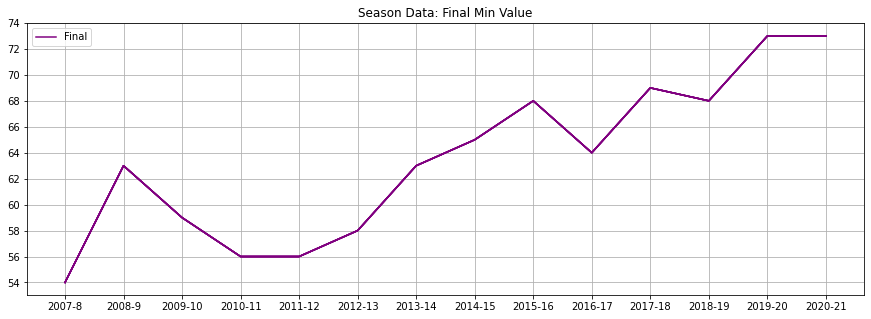

In [26]:
plt.figure(figsize = (15, 5))
plt.title('Season Data: Final Min Value')
plt.plot(x, final_min, c = 'purple')
plt.yticks(np.arange(54, 75, step = 2))
plt.legend(labels = [labels[-2]])
plt.grid(True)

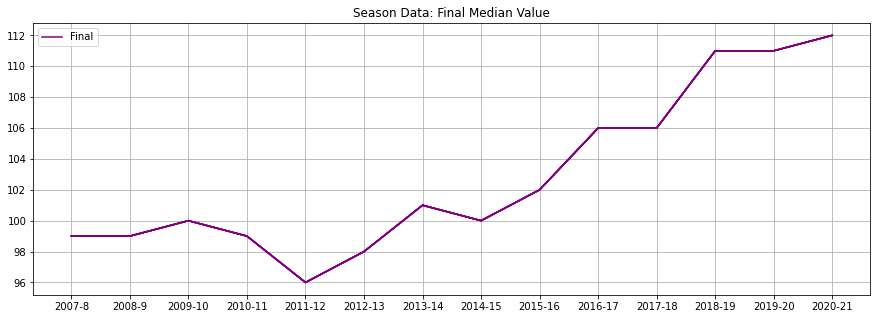

In [27]:
plt.figure(figsize = (15, 5))
plt.title('Season Data: Final Median Value')
plt.plot(x, final_med, c = 'purple')
plt.yticks(np.arange(96, 114, step = 2))
plt.legend(labels = [labels[-2]])
plt.grid(True)